## Explore a retail data set from Kaggle.

Link: https://www.kaggle.com/manjeetsingh/retaildataset

You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Import sales data and describe**

In [62]:
df = pd.read_csv('./Retail-sales.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,store_type,store_size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


**Import stores dataset and explore**

In [63]:
dfstore = pd.read_csv('./Retail-stores.csv')
dfstore.info()
dfstore.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


**How many stores do we have by store type?**

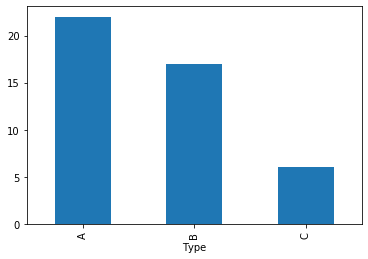

In [59]:
#Using group by
dfstore.groupby('Type')['Store'].count().plot(kind='bar')
plt.show()

**Sales by store type and size**

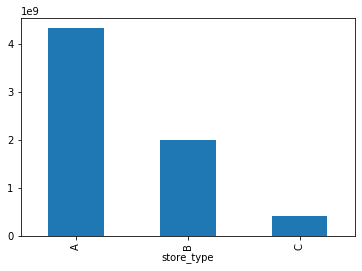

In [95]:
df.groupby('store_type')['Weekly_Sales'].sum().plot(kind='bar')
plt.show()

In [105]:
df['avg_sales'] = df['Weekly_Sales']/df['store_size']
# create a new DF that summarises sales by store size
newdf = pd.DataFrame(df.groupby('store_size')['Weekly_Sales'].sum().sort_values())

In [115]:
# add a new column to calc avg sales/sq ft or m
newdf['avgsales'] = newdf['Weekly_Sales']/newdf.index.values
# add store size back as a column
newdf['store_size'] = newdf.index.values
newdf.head()

,Weekly_Sales,avgsales,store_size
store_size,,,
34875,45475688.90,1303.962406,34875
37392,57586735.07,1540.081704,37392
42988,62716885.12,1458.939358,42988
57197,74252425.40,1298.187412,57197
93638,77141554.31,823.827445,93638


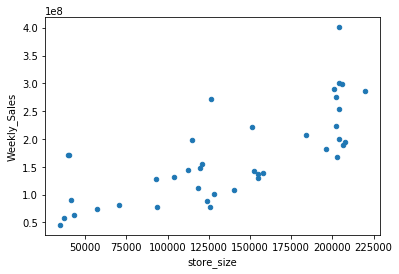

In [114]:
newdf.plot(x='store_size', y='Weekly_Sales',kind='scatter')
plt.show()

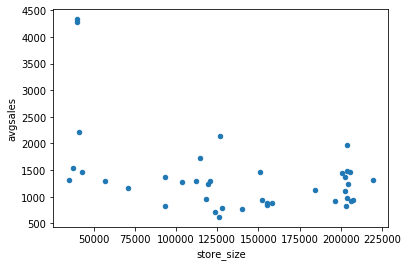

In [129]:
newdf.plot(x='store_size', y='avgsales', kind='scatter')
plt.show()